In [1]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import geopandas as gpd
import glob
import os
import json
from os.path import exists
import piecewise_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
# import pysal as ps
# from pysal.contrib.viz import mapping as maps
from shapely import wkt
from shapely.geometry import Polygon, Point
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# polygon vector
piles = gpd.read_file('/Users/philipp/BPLA Dropbox/03 Planning/DN-Dumping Detection-1087/05_Output/Digitisation/Version-3/DD-lowest/boundary-reviewed/piles-combined-lowest-final-clipped-v2.1.geojson')
piles = piles.to_crs("EPSG:32638")
# piles = piles.to_crs("EPSG:32638")
# piles['str_geom'] = piles['geometry'].apply(wkt.dumps)
piles['int'] = piles['fid'].astype('int64')

In [3]:
len(piles)

6311

In [4]:
# get data
dfs = [] # an empty list to store the data frames`
StartDir = '/Users/philipp/BPLA Dropbox/03 Planning/DN-Dumping Detection-1087/03_Data/Dronedeploy-exports/points/'
crs = None
json_pattern = os.path.join(StartDir,'*.xyz')
file_list = glob.glob(json_pattern)
print(len(file_list))

11


In [5]:
# dump = {"fid": [], "points": [], "height": [],"file":[]}
dump =[]

for file in file_list:
	# print(file)
	data = np.loadtxt(file, delimiter=',')
	crs = None
	geometry = [Point(xyz) for xyz in data]
	geodf = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)
	geodf.crs = {'init': 'epsg:32638'}
	# geodf.crs = {"EPSG:32638"}
	# geodf = geodf.to_crs("EPSG:32638")

	pointInPolys = gpd.tools.sjoin(geodf, piles, predicate="within", how='left')
	pointInPolysNA = pointInPolys.dropna(subset=['fid']).to_numpy()
	print(len(np.unique(pointInPolysNA[:,9])))

	dumpHeight = {"fid": [], "points": [], "height": [],"file":[]}

	# dumpHeight=[]
	for i in np.unique(pointInPolysNA[:, 9]):
		# print(i)
		try:
			subset = pointInPolysNA[pointInPolysNA[:, 9] == i,]
			height = max(subset[:, 2]) - min(subset[:, 2])

		except:
			height = None

		# dumpHeight.append([i,subset.shape[0],height,file])
		dumpHeight["file"].append(file)
		dumpHeight["fid"].append(i)
		dumpHeight["height"].append(height)
		dumpHeight["points"].append(subset.shape[0])
	dump.append(dumpHeight)

/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


304


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


261


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


588


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


243


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


0


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


268


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


0


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


382


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


455


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


0


/Users/philipp/Projects/PycharmProjects/point-cloud-volume/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


466


In [10]:
results = pd.DataFrame()
for d in dump:
	# print(len(d['fid']))
	results = pd.concat([results, pd.DataFrame.from_dict(d)], axis=0)

304
261
588
243
0
382
455
466


In [11]:
results['fidunique'] = results.duplicated(subset=['fid'], keep=False)
results['fidunique'].value_counts()

False    1965
True      734
Name: fidunique, dtype: int64

In [12]:
# unique polygons
final = results[results.fidunique == False]
len(final)

1965

In [14]:
merged = final.merge(piles, on='fid')

In [1]:
x = merged['height']
y = merged['Updat_cut']
x1 =merged['area']
data = list(zip(x,y))

# cluster based om area and volume
from sklearn.cluster import KMeans

inertias = []
for i in range(1, 11):
	kmeans = KMeans(n_clusters=i)
	kmeans.fit(data)
	inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

NameError: name 'merged' is not defined

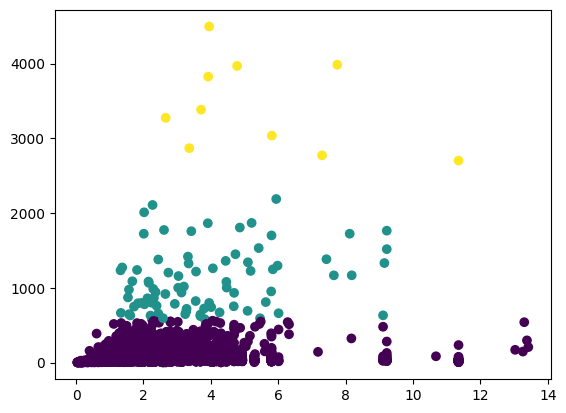

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(x, x1,  c=kmeans.labels_)
# plt.scatter(x1, y)
plt.show()

In [18]:
pd.DataFrame(data)

,0,1
0,1.02,19.515538
1,0.49,111.620967
2,2.35,182.967200
3,0.31,9.757769
4,0.26,12.007192
...,...,...
4363,1.73,35.380907
4364,0.46,11.824106
4365,0.46,11.824106
4366,1.00,17.909295


In [19]:
print(kmeans)

df = pd.DataFrame(data)
df['cluster'] = kmeans.labels_
cluster0 = df[(df["cluster"] == 0)]
cluster1 = df[(df["cluster"] == 1)]  # This is what you want
# cluster2 = df[(df["cluster"] == 1)]  # This is what you want


regClu0 = LinearRegression(fit_intercept=False).fit(cluster0[[0]], cluster0[[1]])
regClu1 = LinearRegression(fit_intercept=True).fit(cluster1[[0]], cluster1[[1]])
# regClu2 = LinearRegression(fit_intercept=False).fit(cluster2[[0]],cluster2[[1]])

KMeans(n_clusters=3)


In [20]:
# The coefficients
print("Coefficients: \n", regClu0.coef_)

Coefficients: 
 [[14.17311011]]


,0,1,cluster
0,1.02,19.515538,0
1,0.49,111.620967,0
2,2.35,182.967200,0
3,0.31,9.757769,0
4,0.26,12.007192,0
...,...,...,...
4363,1.73,35.380907,0
4364,0.46,11.824106,0
4365,0.46,11.824106,0
4366,1.00,17.909295,0
